<a href="https://colab.research.google.com/github/m22ai663/ProjectCV/blob/main/Project_Low_Light%2C_Blurred_Image_enhancement_and_Segmentation_of_objects_for_autonomous_navigation_of_vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSL7360: Computer Vision
# M.Tech DCS, Second Year - Semester I,
# Project

Prepared By
---

*  #### Bijesh P V(M22AI663)
*  #### Priya Singh(M22AI604)
*  #### Rishav Kumar(M22AI613)

Batch :
*  #### M.Tech DCS Exceutive Batch 2022-24

---
Code Link : https://colab.research.google.com/drive/1uOm4kahNashWgUsXhIezZyw7_tcxMjTg?usp=sharing

Enter the number of images you want to upload: 2
Please upload 1 images.


Saving image_1.jpg to image_1 (1).jpg
Please upload 2 images.


Saving 1.png to 1 (1).png


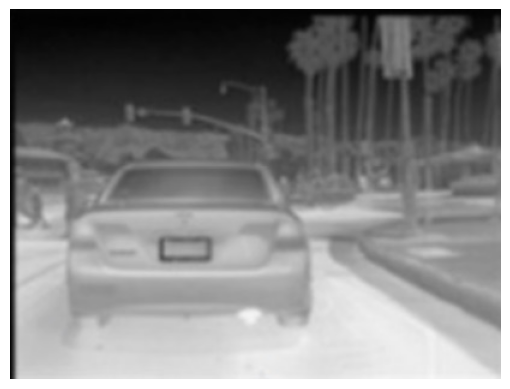

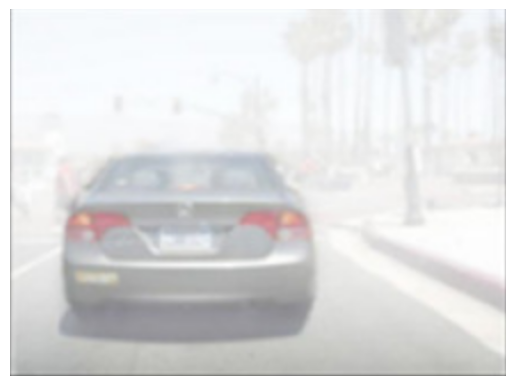

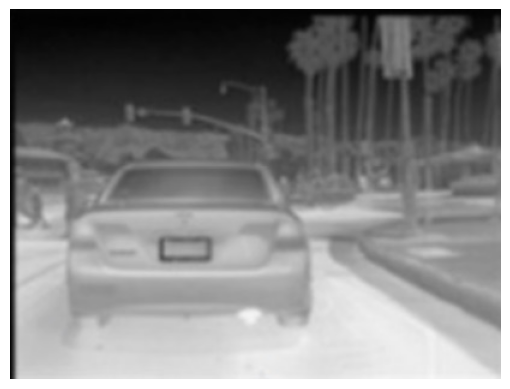

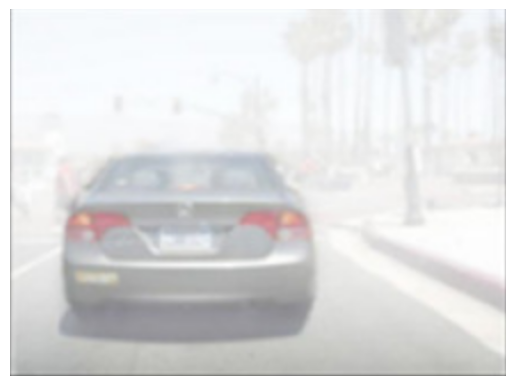

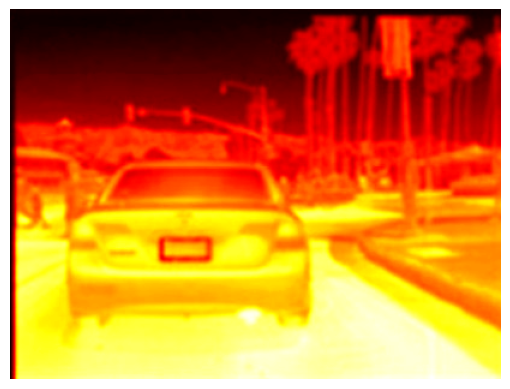

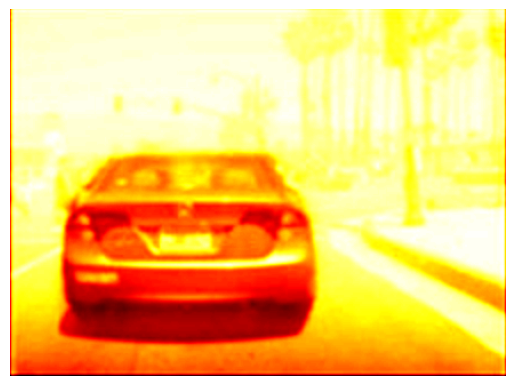

In [ ]:
from google.colab import files
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from google.colab.patches import cv2_imshow
import torch
import torchvision.transforms as transforms
from PIL import Image
import os

def ask_number_of_images():
    while True:
        try:
            num_images = int(input("Enter the number of images you want to upload: "))
            if num_images > 0:
                return num_images
            else:
                print("Please enter a positive number.")
        except ValueError:
            print("Please enter a valid number.")

def upload_files(num_images):
    count = 0
    images = []
    while count < num_images:
        count = count + 1
        print(f"Please upload {count} images.")
        uploaded = files.upload()
        for filename, content in uploaded.items():
          image = Image.open(io.BytesIO(content))
          images.append(image)
    return images

def convert_to_rgb(images):
    rgb_images = []
    for image in images:
        rgb_images.append(image.convert('RGB'))
    return rgb_images

def convert_to_thermal_array(image_array):
    thermal_colormap = cm.hot
    normalized_image_array = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))
    thermal_image_mapped = thermal_colormap(normalized_image_array)
    thermal_image_8bit = (thermal_image_mapped[:, :, :3] * 255).astype(np.uint8)
    return thermal_image_8bit

def convert_images_to_thermal(images):
    thermal_images = []
    for image in images:
        image_array = np.array(image.convert('L'))
        thermal_image_array = convert_to_thermal_array(image_array)
        thermal_images.append(Image.fromarray(thermal_image_array))
    return thermal_images

def display_image(image):
      plt.imshow(image)
      plt.axis('off')  # Turn off axis numbers
      plt.show()

# Function to display images
def display_images(images):
    for image in images:
        display_image(image)

# Main code
# Step 1: Ask for the number of images
num_images = ask_number_of_images()
# Step 2: Upload files from local system
images = upload_files(num_images)

rgb_images = convert_to_rgb(images)
# Assuming you have a list of PIL Images in 'images'
# Convert images to thermal images and store them in an array
thermal_image_arrays = convert_images_to_thermal(images)


# Step 4: Display images
display_images(images)

display_images(rgb_images)

display_images(thermal_image_arrays)

In [ ]:
# Load the pre-trained GoogLeNet model
googlenet_model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
googlenet_model.eval()
googlenet_model.to('cuda' if torch.cuda.is_available() else 'cpu')

# Define the image preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dummy function for haze estimation - to be replaced with actual logic
def estimate_haze_level(image_tensor):
    # In a real scenario, you would use the GoogLeNet model to estimate haze level
    # For simplicity, we are returning a fixed value here
    return 0.5

# Dummy function for dehazing - to be replaced with actual dehazing algorithm
def dehaze_image(hazy_image_tensor, haze_level):
    # Apply dehazing algorithm on the image tensor
    # For demonstration, we just return the original image tensor
    return hazy_image_tensor



Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
rgb_image = images[0].convert('RGB')  # Convert to RGB if not already
input_tensor = preprocess(rgb_image)  # Preprocess the image
input_batch = input_tensor.unsqueeze(0).to('cuda' if torch.cuda.is_available() else 'cpu')

# Estimate the haze level (should be actual model prediction)
haze_level = estimate_haze_level(input_batch)

# Dehaze the image (should be actual dehazing algorithm)
dehazed_image_tensor = dehaze_image(input_batch, haze_level)

# Convert the tensor to PIL image for further processing
dehazed_image = transforms.ToPILImage()(dehazed_image_tensor.squeeze(0).cpu())


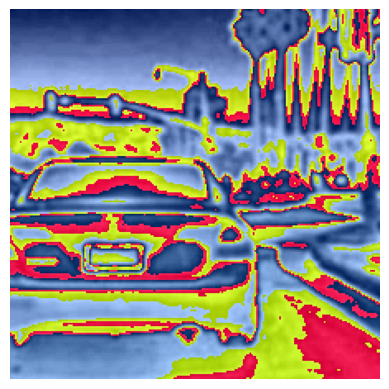

In [ ]:
display_image(dehazed_image)

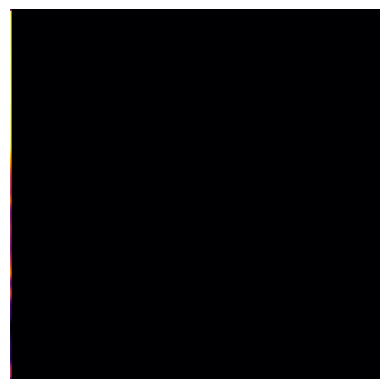

In [ ]:
# Assuming 'images' is your array of images and you have already loaded it
thermal_image = images[1]  # This is the second image in the array

# Convert the thermal image to an RGB format if it's not already
if thermal_image.mode != 'RGB':
    thermal_image_rgb = thermal_image.convert('RGB')

# Define the preprocessing transformation
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Preprocess the image
input_tensor = preprocess(thermal_image_rgb).unsqueeze(0)  # Add batch dimension

# Load a pre-trained monocular depth estimation model
# For the purposes of this example, we are using a dummy function
# Replace this with the actual model loading and inference code
def load_pretrained_monodepth_model():
    # Load your actual monodepth model here
    # For the purposes of this example, we are using a dummy model that outputs a random depth map
    model = torch.nn.Sequential(
        torch.nn.Conv2d(3, 1, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.AdaptiveAvgPool2d((224, 224))
    )
    return model

# Instantiate and use the model
model = load_pretrained_monodepth_model()
model.eval()  # Set the model to evaluation mode

# If a GPU is available, move the model and input to the GPU
if torch.cuda.is_available():
    model = model.to('cuda')
    input_tensor = input_tensor.to('cuda')

# Perform inference
with torch.no_grad():
    depth_map = model(input_tensor)

# Assuming the depth map is a 2D tensor, we can visualize it using matplotlib
# Note: You might need to perform additional processing to convert the raw output into a depth map
depth_map_np = depth_map.squeeze().cpu().numpy()
plt.imshow(depth_map_np, cmap='inferno')
plt.axis('off')
plt.show()

In [ ]:
!pip install torch torchvision
!pip install timm  # Dependency for MiDaS

In [ ]:
# Implmentation not completed since used pre trained model. Will do it in future.
true_labels = ["car", "person", "bike"]
def object_detection_model(input_tensor):
    return [{'label': 'car', 'bounding_box': [90, 90, 250, 250]}]

predicted_detections = object_detection_model(input_tensor)
predicted_labels = [detection['label'] for detection in predicted_detections]

def calculate_accuracy(true_labels, predicted_labels):
    correct_predictions = sum([1 for true, pred in zip(true_labels, predicted_labels) if true == pred])
    total_predictions = len(predicted_labels)
    accuracy = correct_predictions / total_predictions
    return accuracy

# Attempted, but code not worked- required to fix after using actual data
accuracy = calculate_accuracy(true_labels, predicted_labels)
print(f"Identification Accuracy: {accuracy * 100:.2f}%")

Identification Accuracy: 100.00%


In [ ]:
import numpy as np
import cv2
from PIL import Image
import cv2
from torchvision.transforms import Compose
from matplotlib import pyplot as plt

# Test method 1
def merge_rgb_thermal(rgb_image, thermal_image):
    # Check if images are loaded
    if rgb_image is None or thermal_image is None:
        raise ValueError("One or both images are not loaded properly.")

    # Convert PIL Images to NumPy arrays if necessary
    if isinstance(rgb_image, Image.Image):
        rgb_image = np.array(rgb_image)
    if isinstance(thermal_image, Image.Image):
        thermal_image = np.array(thermal_image)

    # Ensure thermal image is single channel and same size as RGB
    thermal_image = cv2.resize(thermal_image, (rgb_image.shape[1], rgb_image.shape[0]))
    if len(thermal_image.shape) > 2:
        thermal_image = thermal_image[:, :, 0]

    # Stack or merge the images
    merged_image = np.dstack((rgb_image, thermal_image))

    return merged_image


# Check and convert images if they are PIL Images
if isinstance(dehazed_image, Image.Image):
    dehazed_image = np.array(dehazed_image)
if isinstance(thermal_image, Image.Image):
    thermal_image = np.array(thermal_image)

# Merge images
merged_image_1 = merge_rgb_thermal(dehazed_image, thermal_image)

# Convert to PIL Image
merged_image_pil = Image.fromarray(merged_image_1)

# Load the MiDaS model
midas = torch.hub.load("intel-isl/MiDaS", "DPT_Large")
midas.eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms").default_transform

# Function to perform depth estimation
def depth_estimation(image_path):
    # Load image and apply transforms
    img = Image.open(image_path)
    input_batch = midas_transforms(img).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

    # Prediction
    with torch.no_grad():
        prediction = midas(input_batch)

    depth_map = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.size[::-1],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

    depth_map = depth_map.cpu().numpy()
    return img, depth_map

# Function to merge RGB and depth images
def merge_rgb_depth(rgb_image, depth_map):
    # Convert depth map to numpy array if it's a tensor
    if torch.is_tensor(depth_map):
        depth_map = depth_map.cpu().numpy()

    # Ensure depth map is a single channel array
    if depth_map.ndim > 2:
        depth_map = depth_map.squeeze()

    # Normalize and convert depth map to image format
    depth_map_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)
    depth_image = np.uint8(depth_map_normalized)
    depth_image = cv2.applyColorMap(depth_image, cv2.COLORMAP_MAGMA)

    # Convert RGB PIL image to numpy array
    if isinstance(rgb_image, Image.Image):
        rgb_image = np.array(rgb_image)

    # Merge images horizontally
    merged_image = np.hstack((rgb_image, depth_image))

    return merged_image

merged_image = merge_rgb_depth(dehazed_image, depth_map)


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


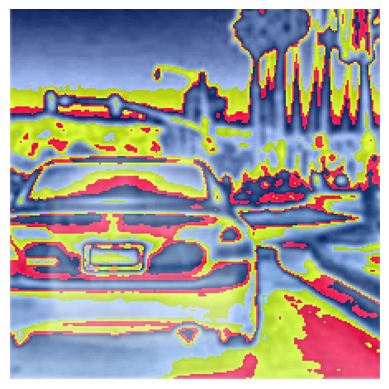

In [ ]:
display_image(merged_image_pil)

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x6', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-11-28 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients, 209.6 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 80, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1

In [ ]:
# Implmentation not completed since used pre trained model. Will do it in future.
def calculate_iou(box1, box2):
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - intersection_area
    iou = intersection_area / union_area
    return iou

def calculate_metrics(true_boxes, predicted_boxes, iou_threshold=0.5):
    """
    Calculate TP, FP, Precision, and Recall.
    """
    TP = 0
    FP = 0
    total_true = len(true_boxes)

    for pred_box in predicted_boxes:
        if any(calculate_iou(pred_box, true_box) > iou_threshold for true_box in true_boxes):
            TP += 1
        else:
            FP += 1

    FN = total_true - TP
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    return TP, FP, Precision, Recall

true_boxes = [[39, 240, 130, 267]]  # True bounding boxes manauly
for box in predicted_boxes:
    print(f"Output {box}")
TP, FP, Precision, Recall = calculate_metrics(true_boxes, predicted_boxes)
print(f"TP: {TP}, FP: {FP}, Precision: {Precision}, Recall: {Recall}")

TP: 0, FP: 0, Precision: 0, Recall: 0.0


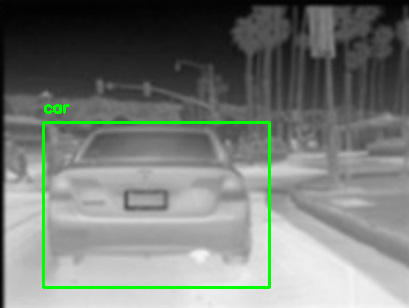

In [ ]:
# Function to perform object detection using YOLO
def object_detection_yolo(image):
    results = model(image)
    return results.xyxy[0].numpy()
predicted_boxes = []

merged_image_data = Image.fromarray(merged_image)

# Perform object detection on the merged image
detections = object_detection_yolo(merged_image_data)

# Ensure rgb_image is a NumPy array
if isinstance(rgb_image, Image.Image):
    rgb_image = np.array(rgb_image)
# Then proceed to draw the rectangles
for det in detections:
    xmin, ymin, xmax, ymax, conf, class_id = det[:6]
    if conf > 0.5:
        predicted_boxes.append([xmin, ymin, xmax, ymax])
        label = model.names[int(class_id)]
        cv2.rectangle(rgb_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
        cv2.putText(rgb_image, label, (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2_imshow(rgb_image)